In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier #тестирование предварительной обрезки для дерева решений
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,stratify=data.target, random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
train_score=tree.score(X_train, y_train) # =1, т.к. листья являются чистыми
test_score=tree.score(X_test, y_test)
print (train_score, test_score) 

1.0 0.937062937063


In [9]:
#ограничение глубины дерева путем объявления max_depth
tree_cut = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_cut.fit(X_test, y_test)
train_score=tree_cut.score(X_train, y_train)
test_score=tree_cut.score(X_test,y_test)
print(train_score, test_score)

0.91549295774647887

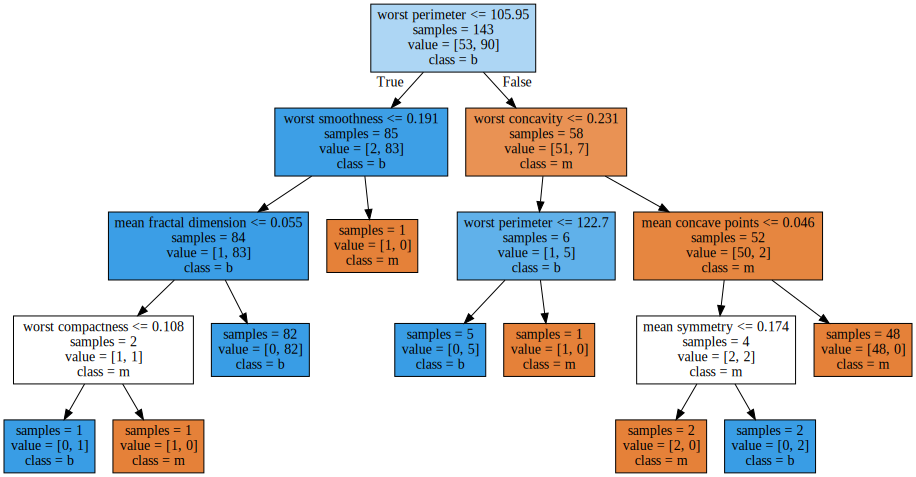

In [18]:
#визуализация дерева
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,stratify=data.target, random_state=42)
tree_cut = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_cut.fit(X_test, y_test)

export_graphviz(tree_cut, out_file=r'C:\Users\Константин\Desktop\tree_cut.dot', class_names=['m','b'], feature_names=data.feature_names, impurity=False, filled=True)
with open(r'C:\Users\Константин\Desktop\tree_cut.dot') as file:
    dot_graph=file.read()
graphviz.Source(dot_graph)

In [23]:
#построение диаграмы дерева
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import export_graphviz

data3=load_breast_cancer()
X_train, X_test, y_train, y_test =train_test_split(data3.data, data3.target, stratify=data3.target, random_state=42)
clf=tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf=clf.fit(X_train, y_train)

import pydotplus
dot_data=tree.export_graphviz(clf, out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write(r'C:\Users\Константин\Desktop\tree_cut.pdf')

True

In [27]:
#анализ важности признаков в деревьях. от 0 (не используется) до 1 (отлично предсказывает целевую переменную)
tree_cut.feature_importances_
for name, score in zip (data3.feature_names, tree_cut.feature_importances_):
    print (name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0276729559748
mean symmetry 0.0299790356394
mean fractal dimension 0.0146326245383
radius error 0.0
texture error 0.0
perimeter error 0.0
area error 0.0
smoothness error 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.0
worst texture 0.0
worst perimeter 0.781909103409
worst area 0.0
worst smoothness 0.0289251507731
worst compactness 0.0149895178197
worst concavity 0.101891611846
worst concave points 0.0
worst symmetry 0.0
worst fractal dimension 0.0


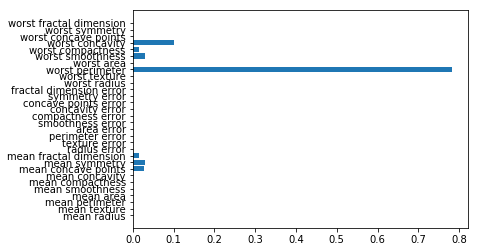

In [34]:
def plot_feature_importances(model):
    n_feature=data3.data.shape[1]
    plt.barh(range(n_feature), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feature), data3.feature_names)

plot_feature_importances(tree_cut)

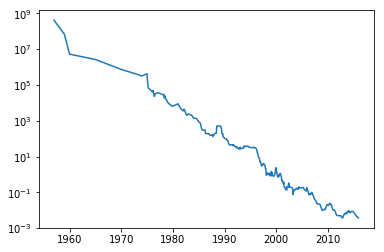

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv(r'C:\Users\Константин\Desktop\ram_price.csv', engine='python')
del data['Unnamed: 0']
plt.semilogy(data.date, data.price)

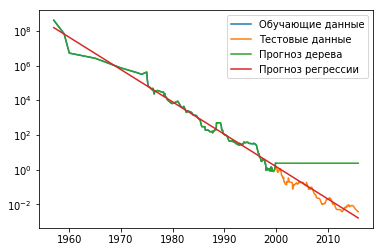

In [26]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train=data[data.date<2000]
data_test=data[data.date>=2000]

X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train, y_train)
lin_reg=LinearRegression().fit(X_train, y_train)

X_all=data.date[:, np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=lin_reg.predict(X_all)

pred_tree=np.exp(pred_tree)
pred_lr=np.exp(pred_lr)

#plt.semilogy created plot with log scaling on y axis

plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(data.date, pred_tree, label="Прогноз дерева")
plt.semilogy(data.date, pred_lr, label="Прогноз регрессии")
plt.legend()